In [55]:
df<-read.csv('d:/data/ozone/ozone4.csv')
head(df)

Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2,Result
41,190,190.0000,7.4,67,5,1,41.00000,0
36,118,118.0000,8.0,72,5,2,36.00000,0
12,149,149.0000,12.6,74,5,3,12.00000,0
18,313,313.0000,11.5,62,5,4,18.00000,0
NA,NA,185.9315,14.3,56,5,5,42.12931,0
28,NA,185.9315,14.9,66,5,6,28.00000,0


In [56]:
library(dplyr)
df<-df %>% select(-Solar.R,-Month,-Day,-Ozone,-Ozone2)
head(df)

Solar.R2,Wind,Temp,Result
190.0000,7.4,67,0
118.0000,8.0,72,0
149.0000,12.6,74,0
313.0000,11.5,62,0
185.9315,14.3,56,0
185.9315,14.9,66,0



  0   1 
109  44 

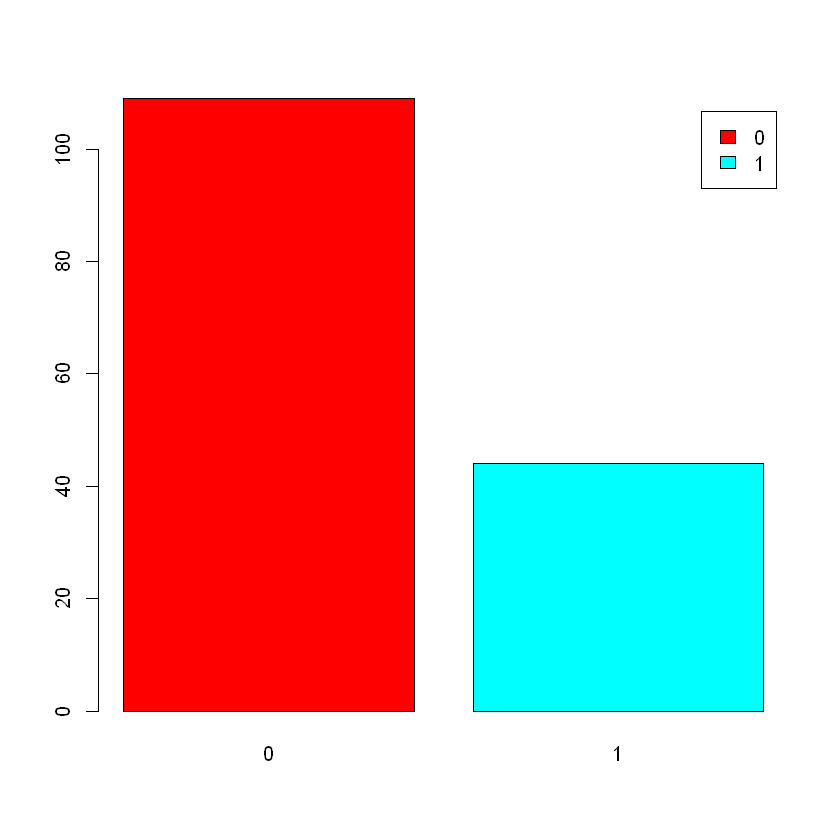

In [57]:
(tbl<-table(df$Result))
barplot(tbl,beside=T,legend=T,col=rainbow(2))

In [58]:
library(ROSE)
#언더샘플링
df_samp<-ovun.sample(Result ~., data=df, seed=1, method='under',
                    N=44*2)$data
(tbl<-table(df_samp$Result))


 0  1 
44 44 

In [59]:
library(ROSE)
#언더샘플링
df_samp<-ovun.sample(Result ~., data=df, seed=1, method='over',
                    N=109*2)$data
(tbl<-table(df_samp$Result))


  0   1 
109 109 

In [60]:
library(caret)
set.seed(123)
#학습용:검증용 8:2로 구분
idx_train<-createDataPartition(y=df_samp$Result,p=0.8,list=F)
train<-df_samp[idx_train,]
X_train<-train[,-4]
y_train<-train[,4]
test<-df_samp[-idx_train,]
X_test<-test[,-4]
y_test<-test[,4]

[1] 0.8809524 0.8095238 0.7619048 0.7619048 0.7619048 0.8095238 0.8571429
 [8] 0.7619048 0.8809524 0.7619048

k,accuracy
1,0.8809524
2,0.8095238
3,0.7619048
4,0.7619048
5,0.7619048
6,0.8095238
7,0.8571429
8,0.7619048
9,0.8809524
10,0.7619048


k,accuracy
1,0.8809524


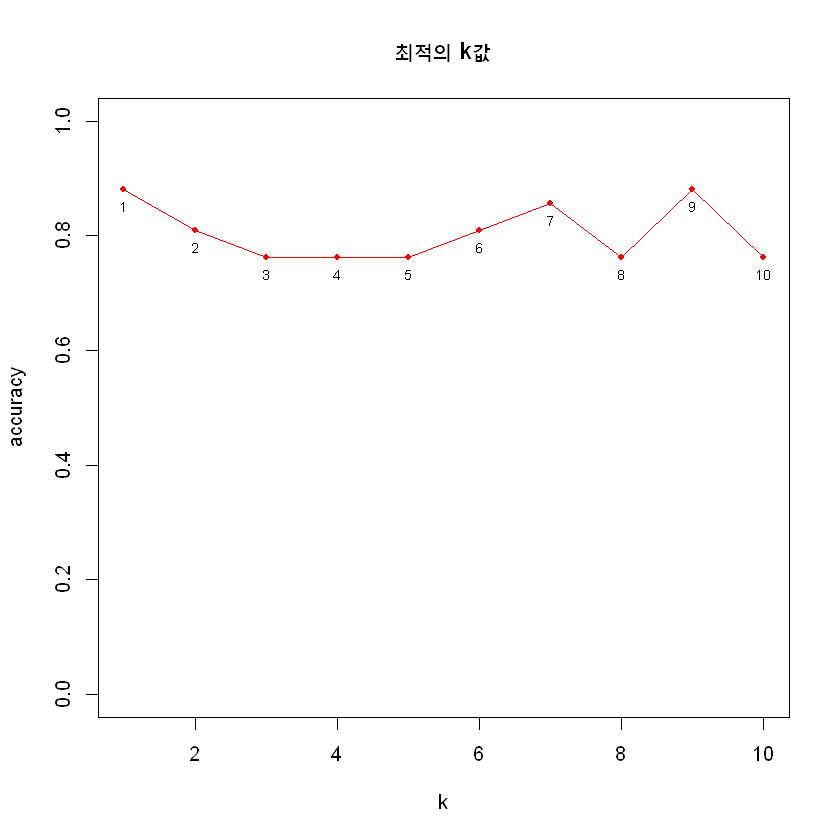

In [61]:
library(class)
acc<-NULL #비어있는 벡터 
for ( i in c(1:10)){ #k값을 1~10까지 증가시키면서 예측정확도 비교
    set.seed(123)
    pred=knn(train=train,test=test,cl=y_train,k=i)
    #벡터에 결과값 추가
    acc<-c(acc,mean(y_test == pred))

}
acc
df<-data.frame(k=c(1:10), accuracy=acc) #데이터프레임 생성
plot(accuracy ~ k, data=df, type='o', pch=20, main='최적의 k값',
    ylim=c(0,1),col='red')
#그래프에 라벨 추가
with(df,text(accuracy ~ k, labels = c(1:10), pos=1, cex=0.7))
df
#정확도가 가장 높은 k의 값 구하기
n<-min(df[df$accuracy %in% max(acc), 'k'])
df[n,]

In [62]:
library(class)
set.seed(123) #랜덤시드 고정
# knn 함수 knn(train=학습용데이터, test=검증용데이터,cl=분류라벨, k=이웃의 수)
pred<-knn(train=train, test=test, cl=y_train, k=n)
pred #모형이 예측한 값
y_test #실제값

[1] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
[39] 1 1 1 1
Levels: 0 1

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1

In [63]:
table(y_test,pred) #오분류표
mean(y_test==pred) #예측정확도

      pred
y_test  0  1
     0 17  4
     1  1 20

[1] 0.8809524